<a href="https://colab.research.google.com/github/kelseymatsik/ds4002_project2/blob/main/Project2EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! git clone https://github.com/kelseymatsik/ds4002_project2

In [1]:
import pandas as pd
crime = pd.read_csv('./Crime_Data.csv')
crime.describe()

,RecordID,IncidentID,BlockNumber,HourReported
count,25111.000000,2.511100e+04,23322.000000,25111.000000
mean,12556.000000,2.021956e+11,883.440528,1346.739755
std,7249.065641,1.517163e+08,631.204242,586.961422
min,1.000000,2.019000e+11,100.000000,0.000000
25%,6278.500000,2.021000e+11,400.000000,958.000000
50%,12556.000000,2.022000e+11,800.000000,1403.000000
75%,18833.500000,2.023000e+11,1300.000000,1809.000000
max,25111.000000,2.024800e+11,6400.000000,2359.000000


In [2]:
crime.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Assist Citizen - Mental/TDO/ECO,202400034093,900.0,"ELLIOTT AVE, A",CPD,2024/10/02 00:24:02+00,2024,"Venereo, Arturo"
1,2,Larceny - Of Veh Parts/Access,202400034075,1600.0,"6TH ST SE, 28",CPD,2024/10/01 21:38:47+00,1738,"Kirby, Tyree"
2,3,Hit and Run,202400034071,900.0,EMMET ST N,CPD,2024/10/01 21:11:45+00,1711,"Bland, Johnnà"
3,4,Disorderly Conduct,202400034068,900.0,"ST CLAIR AVE, A",CPD,2024/10/01 20:59:17+00,1659,"Prevost, Payten"
4,5,Lost/FoundProperty,202400034047,700.0,RUGBY RD,CPD,2024/10/01 18:23:15+00,1423,"Brannon, Devin"


In [3]:
# convert to eastern time zone
import pytz
eastern = pytz.timezone('America/New_York')

crime['DateReported'] = pd.to_datetime(crime['DateReported'])

# Localize to UTC if not already timezoned
#crime['DateReported'] = crime['DateReported'].dt.tz_localize('UTC')

# Define the Eastern Time zone
eastern = pytz.timezone('America/New_York')

# Convert the DateReported column to Eastern Time
crime['DateReported'] = crime['DateReported'].dt.tz_convert(eastern)

In [4]:
crime.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Assist Citizen - Mental/TDO/ECO,202400034093,900.0,"ELLIOTT AVE, A",CPD,2024-10-01 20:24:02-04:00,2024,"Venereo, Arturo"
1,2,Larceny - Of Veh Parts/Access,202400034075,1600.0,"6TH ST SE, 28",CPD,2024-10-01 17:38:47-04:00,1738,"Kirby, Tyree"
2,3,Hit and Run,202400034071,900.0,EMMET ST N,CPD,2024-10-01 17:11:45-04:00,1711,"Bland, Johnnà"
3,4,Disorderly Conduct,202400034068,900.0,"ST CLAIR AVE, A",CPD,2024-10-01 16:59:17-04:00,1659,"Prevost, Payten"
4,5,Lost/FoundProperty,202400034047,700.0,RUGBY RD,CPD,2024-10-01 14:23:15-04:00,1423,"Brannon, Devin"


In [5]:
crime['Offense'].value_counts()

Offense
Hit and Run                     2167
Assault Simple                  1911
Suspicious Activity             1693
Vandalism                       1627
Larceny - From Motor Vehicle    1554
                                ... 
Traffic - Traffic Hazard           1
Stop w/o Search/Frisk              1
Prostitution                       1
Traffic - Disabled Vehicle         1
Stop w/Search/Frisk                1
Name: count, Length: 111, dtype: int64

In [6]:
crime['Offense'] = crime['Offense'].str.replace(r'.*Larceny.*', 'Larceny', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Assist Citizen.*', 'Assist Citizen', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Sex Offense.*', 'Sex Offense', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Fraud.*', 'Fraud', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Accident.*', 'Accident', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Robbery.*', 'Robbery', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Traffic.*', 'Traffic', regex=True)

In [7]:
crime['Offense'].value_counts()

Offense
Larceny                            5347
Hit and Run                        2167
Assault Simple                     1911
Suspicious Activity                1693
Vandalism                          1627
                                   ... 
911 Investigation                     1
Tactical Crime Initiative - TCI       1
Stop w/o Search/Frisk                 1
Prostitution                          1
Stop w/Search/Frisk                   1
Name: count, Length: 84, dtype: int64

# Scraping to Find Start End dates


In [8]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd


header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0"
}



### First Get List of Links to Scrape


In [9]:
url = "https://records.ureg.virginia.edu/content.php?catoid=61&navoid=5319&print"
raw = requests.get(url, headers=header)


In [10]:
bsObj = soup(raw.content, "html.parser")  # Parse the html
links = bsObj.find_all("li")

#links_needed = links[47:]

links_needed = []
for link in links:
    if "Undergraduate Record" in link.get_text():
        links_needed.append(link)

link_list = []
for link in links_needed:
    #print(link.text)

    link_list.append(link.find("a")["href"])

print(link_list)


['index.php?catoid=1', 'index.php?catoid=7', 'index.php?catoid=11', 'index.php?catoid=17', 'index.php?catoid=22', 'index.php?catoid=25', 'index.php?catoid=27', 'index.php?catoid=31', 'index.php?catoid=33', 'index.php?catoid=37', 'index.php?catoid=39', 'index.php?catoid=42', 'index.php?catoid=43', 'index.php?catoid=45', 'index.php?catoid=47', 'index.php?catoid=49', 'index.php?catoid=52', 'index.php?catoid=54', 'index.php?catoid=58']


### Scrape List of Links to Get Academic Calander Links

In [11]:
base_url = 'https://records.ureg.virginia.edu/'

links = []


for link in link_list:
    url = base_url + link
    raw = requests.get(url, headers=header)
    bsObj = soup(raw.content, "html.parser")  # Parse the html
    links_in_url = bsObj.find_all("div", class_="n2_links")
    for l in links_in_url:
        if "Academic Calendar" in l.get_text():
            links.append(l.find("a")["href"])


In [13]:
print(links)

['/content.php?catoid=1&navoid=18', '/content.php?catoid=7&navoid=113', '/content.php?catoid=11&navoid=173', '/content.php?catoid=17&navoid=264', '/content.php?catoid=22&navoid=517', '/content.php?catoid=25&navoid=615', '/content.php?catoid=27&navoid=723', '/content.php?catoid=31&navoid=971', '/content.php?catoid=33&navoid=1330', '/content.php?catoid=37&navoid=2125', '/content.php?catoid=39&navoid=2366', '/content.php?catoid=42&navoid=2752', '/content.php?catoid=43&navoid=3015', '/content.php?catoid=45&navoid=3263', '/content.php?catoid=47&navoid=3479', '/content.php?catoid=49&navoid=3701', '/content.php?catoid=52&navoid=4103', '/content.php?catoid=54&navoid=4364', '/content.php?catoid=58&navoid=4879']


### Get Dates From Each Link in List

In [12]:
url = base_url + links[5]
print(url)

url = 'https://records.ureg.virginia.edu/content.php?catoid=37&navoid=2125'

raw = requests.get(url, headers=header)




bsObj = soup(raw.content, "html.parser")  # Parse the html


https://records.ureg.virginia.edu//content.php?catoid=25&navoid=615


In [13]:

events = []
current_semester = ""
for tag in bsObj.find_all(['h2', 'h3', 'h4']):
    potential_semester = tag.get_text(strip=True)
    if "semester" in potential_semester.lower() or "term" in potential_semester.lower():
        current_semester = potential_semester

    next_sibling = tag.find_next_sibling()
    while next_sibling and next_sibling.name not in ['h2', 'h3', 'h4']:
        if next_sibling.name == 'table':
            for tr in next_sibling.find_all('tr'):
                tds = tr.find_all('td')
                if len(tds) >= 2:
                    event_name = tds[0].get_text(strip=True)
                    date_range = tds[1].get_text(strip=True).replace('<br>', ' - ').replace('</br>', ' - ')
                    if event_name and date_range:
                        events.append((current_semester, event_name, date_range))
        next_sibling = next_sibling.find_next_sibling()

for event in events:
    print(f"{event[0]}: {event[1]}: {event[2]}")

Fall Semester 2014: Orientation Begins: Saturday, August 23-Monday, August 25
Fall Semester 2014: Courses Begin: Tuesday, August 26
Fall Semester 2014: Add/Drop/Withdrawal: Vary by School
Fall Semester 2014: Fall Convocation: Friday, October 31
Fall Semester 2014: Family Weekend: Friday, October 31 - Sunday, November 2
Fall Semester 2014: Reading Days: Saturday, October 11-Tuesday, October 14
Fall Semester 2014: Thanksgiving Recess: Wednesday, November 26-Sunday, November 30
Fall Semester 2014: Courses End: Friday, December 5
Fall Semester 2014: Reading Day: Sunday, December 7
Fall Semester 2014: Examinations: Monday, December 8-Tuesday, December 16
Fall Semester 2014: Reading Days: Thursday, December 11; Sunday, December 14
Fall Semester 2014: Fall degrees conferred: Tuesday, December 30 (no ceremony)
January Term 2015: Courses Begin: Friday, January 2-Saturday, January 10
January Term 2015: Courses End: Saturday, January 10
Spring Semester 2015: Courses Begin: Monday, January 12
Spri

In [14]:
import requests
from bs4 import BeautifulSoup as soup

base_url = 'https://records.ureg.virginia.edu/'
events = []
current_semester = ""

for link in links:
    url = base_url + link
    raw = requests.get(url, headers=header)
    bsObj = soup(raw.content, "html.parser")  # Parse the HTML

    for tag in bsObj.find_all(['tr', 'h2', 'h3', 'h4']):
        if tag.name in ['h2', 'h3', 'h4']:
            potential_semester = tag.get_text(strip=True)
            if "semester" in potential_semester.lower() or "term" in potential_semester.lower():
                current_semester = potential_semester
        elif tag.name == 'tr':
            tds = tag.find_all('td')
            if len(tds) in [2, 3]:
                event_name = tds[0].get_text(strip=True)
                date_range = tds[-1].get_text(strip=True).replace('<br>', ' - ').replace('</br>', ' - ')
                if (event_name.lower() in ['courses begin', 'courses end']) and date_range:
                    events.append((current_semester, event_name, date_range))

events.append(('Fall 2024', 'Courses Begin', 'Monday, August 27'))
events.append(('Fall 2024', 'Courses End', 'Friday, December 6'))
events.append(('Spring 2025', 'Courses Begin', 'Monday, January 13'))
events.append(('Spring 2025', 'Courses End', 'Friday, April 29'))



for event in events:
    print(f"{event[0]}: {event[1]}: {event[2]}")


Fall Semester 2005: Courses Begin: Wednesday, August 24
Fall Semester 2005: Courses End: Tuesday, December 6
January Term 2006: Courses Begin: Tuesday, January 3
January Term 2006: Courses End: Monday, January 16
Spring Semester 2006: Courses Begin: Wednesday, January 18
Spring Semester 2006: Courses End: Tuesday, May 2
Fall Semester 2006: Courses Begin: Wednesday, August 23
Fall Semester 2006: Courses End: Tuesday, December 5
January Term 2007: Courses Begin: Tuesday, January 2
January Term 2007: Courses End: Friday, January 12
Spring Semester 2007: Courses Begin: Wednesday, January 17
Spring Semester 2007: Courses End: Tuesday, May 1
Fall Semester 2007: Courses Begin: Tuesday, August 28
Fall Semester 2007: Courses End: Friday, December 7
January Term 2008: Courses Begin: Wednesday, January 2
January Term 2008: Courses End: Friday, January 11
Spring Semester 2008: Courses Begin: Wednesday, January 16
Spring Semester 2008: Courses End: Tuesday, April 29
Fall Semester 2008: Courses Begi

### Adding date to the df_dates table

In [15]:
import numpy as np
from datetime import datetime

df_dates = pd.DataFrame(columns=['Semester','Start', 'End'])


rows_to_add = []

for i in range(0, len(events), 2):
  start = events[i]
  end = events[i+1]
  length = len(start[0])
  year = start[0][length - 4 : ]

  # cleaning to get dates
  start_date_str = start[2].split(',')[1].split('-')[0].split('(')[0].strip() + ', '+ year
  end_date_str = end[2].split(',')[1].split('No ')[0].split('(')[0].strip()  + ', ' + year

  # Converting strings to datetime objects
  start_date = datetime.strptime(start_date_str, "%B %d, %Y")
  end_date = datetime.strptime(end_date_str, "%B %d, %Y")

  # Formatting dates to desired format
  start_date_formatted = start_date.strftime("%Y/%m/%d")
  end_date_formatted = end_date.strftime("%Y/%m/%d")



  #print(events[i][0])
  #print(start_date)
  #print(end_date)
  #print('\n')

  add = [events[i][0], start_date_formatted, end_date_formatted]
  rows_to_add.append(add)

df_dates = pd.concat([df_dates, pd.DataFrame(rows_to_add, columns=df_dates.columns)], ignore_index=True)


df_dates

,Semester,Start,End
0,Fall Semester 2005,2005/08/24,2005/12/06
1,January Term 2006,2006/01/03,2006/01/16
2,Spring Semester 2006,2006/01/18,2006/05/02
3,Fall Semester 2006,2006/08/23,2006/12/05
4,January Term 2007,2007/01/02,2007/01/12
5,Spring Semester 2007,2007/01/17,2007/05/01
6,Fall Semester 2007,2007/08/28,2007/12/07
7,January Term 2008,2008/01/02,2008/01/11
8,Spring Semester 2008,2008/01/16,2008/04/29
9,Fall Semester 2008,2008/08/26,2008/12/05


In [23]:
fall_dates = df_dates[df_dates["Semester"].str.contains("Fall")]
print(f"Fall semester starts earliest in: {fall_dates['Start'].min()}")
print(f"Fall semester starts latest in: {fall_dates['Start'].max()}")

print(f"Fall semester ends earliest in: {fall_dates['End'].min()}")
print(f"Fall semester ends latest in: {fall_dates['End'].max()}")

spring_dates = df_dates[df_dates["Semester"].str.contains("Spring")]
print(f"Spring semester earliest start: {spring_dates['Start'].min()}")
print(f"Spring semester latest start: {spring_dates['Start'].max()}")
print(f"Spring semester earliest end: {spring_dates['End'].min()}")
print(f"Spring semester latest end: {spring_dates['End'].max()}")

jterm_dates = df_dates[df_dates["Semester"].str.contains("January")]
print(f"J-Term earliest start: {jterm_dates['Start'].min()}")
print(f"J-Term latest start: {jterm_dates['Start'].max()}")
print(f"J-Term earliest end: {jterm_dates['End'].min()}")
print(f"J-Term latest end: {jterm_dates['End'].max()}")

Fall semester starts earliest in: 2005/08/24
Fall semester starts latest in: 2024/08/27
Fall semester ends earliest in: 2005/12/06
Fall semester ends latest in: 2024/12/06
Spring semester earliest start: 2006/01/18
Spring semester latest start: 2025/01/13
Spring semester earliest end: 2006/05/02
Spring semester latest end: 2025/04/29
J-Term earliest start: 2006/01/03
J-Term latest start: 2024/01/02
J-Term earliest end: 2006/01/16
J-Term latest end: 2024/01/12


### Adding During UVA Semesters To Main Table

In [18]:
def inSession(given):
  given = str(given)
  g = datetime.strptime(given.split(" ")[0], "%Y-%m-%d") # 2024/10/02 00:24:02+00
  start = df_dates['Start'].tolist()
  end = df_dates['End'].tolist()

  #print(g)

  for i in range(len(start)):
    start_date = start[i]
    end_date = end[i]
    #print(datetime.strptime(start_date.split(" ")[0], "%Y/%m/%d"))
    #print(datetime.strptime(end_date.split(" ")[0], "%Y/%m/%d"))

    if datetime.strptime(start_date.split(" ")[0], "%Y/%m/%d") <= g <= datetime.strptime(end_date.split(" ")[0], "%Y/%m/%d"):
      return 1

  return 0



inSession(crime['DateReported'][9009])

1

In [19]:
crime["InSession"] = crime['DateReported'].apply(inSession)

crime.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer,InSession
0,1,Assist Citizen,202400034093,900.0,"ELLIOTT AVE, A",CPD,2024-10-01 20:24:02-04:00,2024,"Venereo, Arturo",1
1,2,Larceny,202400034075,1600.0,"6TH ST SE, 28",CPD,2024-10-01 17:38:47-04:00,1738,"Kirby, Tyree",1
2,3,Hit and Run,202400034071,900.0,EMMET ST N,CPD,2024-10-01 17:11:45-04:00,1711,"Bland, Johnnà",1
3,4,Disorderly Conduct,202400034068,900.0,"ST CLAIR AVE, A",CPD,2024-10-01 16:59:17-04:00,1659,"Prevost, Payten",1
4,5,Lost/FoundProperty,202400034047,700.0,RUGBY RD,CPD,2024-10-01 14:23:15-04:00,1423,"Brannon, Devin",1


# Adding Other Variables

### Day Of the Week

In [20]:
# Method that converts the date to the day of the week
def toDayOfWeek(date):
  date = str(date)
  date = datetime.strptime(date.split(" ")[0], "%Y-%m-%d") # 2024/10/02 00:24:02+00
  day = date.strftime("%A")
  return day

toDayOfWeek(crime['DateReported'][0])

'Tuesday'

In [21]:
crime["DayOfWeek"] = crime['DateReported'].apply(toDayOfWeek)

crime.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer,InSession,DayOfWeek
0,1,Assist Citizen,202400034093,900.0,"ELLIOTT AVE, A",CPD,2024-10-01 20:24:02-04:00,2024,"Venereo, Arturo",1,Tuesday
1,2,Larceny,202400034075,1600.0,"6TH ST SE, 28",CPD,2024-10-01 17:38:47-04:00,1738,"Kirby, Tyree",1,Tuesday
2,3,Hit and Run,202400034071,900.0,EMMET ST N,CPD,2024-10-01 17:11:45-04:00,1711,"Bland, Johnnà",1,Tuesday
3,4,Disorderly Conduct,202400034068,900.0,"ST CLAIR AVE, A",CPD,2024-10-01 16:59:17-04:00,1659,"Prevost, Payten",1,Tuesday
4,5,Lost/FoundProperty,202400034047,700.0,RUGBY RD,CPD,2024-10-01 14:23:15-04:00,1423,"Brannon, Devin",1,Tuesday


### Sunset Variable

In [22]:
! pip3 install astral


In [23]:
from astral import LocationInfo
from datetime import datetime, timedelta
import pytz

city = LocationInfo("Richmond", "USA", "America/New_York", 37.54, -77.43)
print((
    f"Information for {city.name}/{city.region}\n"
    f"Timezone: {city.timezone}\n"
    f"Latitude: {city.latitude:.02f}; Longitude: {city.longitude:.02f}\n"
))

eastern = pytz.timezone("America/New_York")

def sunsetData(date):
    try:
        day = str(date)

        #print(day)
        #print(type(day))

        day = datetime.strptime(day.split(" ")[0], "%Y-%m-%d")

        #print(type(day))
        from astral.sun import sun

        s = sun(city.observer, date=day)
        dawn = s["dawn"].astimezone(eastern)
        sunrise = s["sunrise"].astimezone(eastern)
        noon = s["noon"].astimezone(eastern)
        sunset = s["sunset"].astimezone(eastern)
        dusk = s["dusk"].astimezone(eastern)


        if dawn <= date < sunrise:
            return "Dawn"
        elif sunrise <= date < noon:
            return "Sunrise"
        elif noon <= date < sunset:
            return "Noon"
        elif sunset <= date < dusk:
            return "Sunset"
        else:
            return "Dusk"
    except ValueError as e:
        #print(f"Error: {e} for date {date}")
        #print( f"Error: Unable to determine sunset time for date {date}")
        return np.nan

sunsetData(crime["DateReported"][0])


Information for Richmond/USA
Timezone: America/New_York
Latitude: 37.54; Longitude: -77.43



'Dusk'

In [24]:
crime["TimeOfDay_Adjusted"] = crime['DateReported'].apply(sunsetData)

crime.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer,InSession,DayOfWeek,TimeOfDay_Adjusted
0,1,Assist Citizen,202400034093,900.0,"ELLIOTT AVE, A",CPD,2024-10-01 20:24:02-04:00,2024,"Venereo, Arturo",1,Tuesday,Dusk
1,2,Larceny,202400034075,1600.0,"6TH ST SE, 28",CPD,2024-10-01 17:38:47-04:00,1738,"Kirby, Tyree",1,Tuesday,Noon
2,3,Hit and Run,202400034071,900.0,EMMET ST N,CPD,2024-10-01 17:11:45-04:00,1711,"Bland, Johnnà",1,Tuesday,Noon
3,4,Disorderly Conduct,202400034068,900.0,"ST CLAIR AVE, A",CPD,2024-10-01 16:59:17-04:00,1659,"Prevost, Payten",1,Tuesday,Noon
4,5,Lost/FoundProperty,202400034047,700.0,RUGBY RD,CPD,2024-10-01 14:23:15-04:00,1423,"Brannon, Devin",1,Tuesday,Noon


In [25]:
print(crime['TimeOfDay_Adjusted'].isna().sum())

unique_values = crime['TimeOfDay_Adjusted'].unique()
print(f"Unique values in 'TimeOfDay_Adjusted': {unique_values}")

119
Unique values in 'TimeOfDay_Adjusted': ['Dusk' 'Noon' 'Sunrise' 'Sunset' 'Dawn' nan]


# EDA

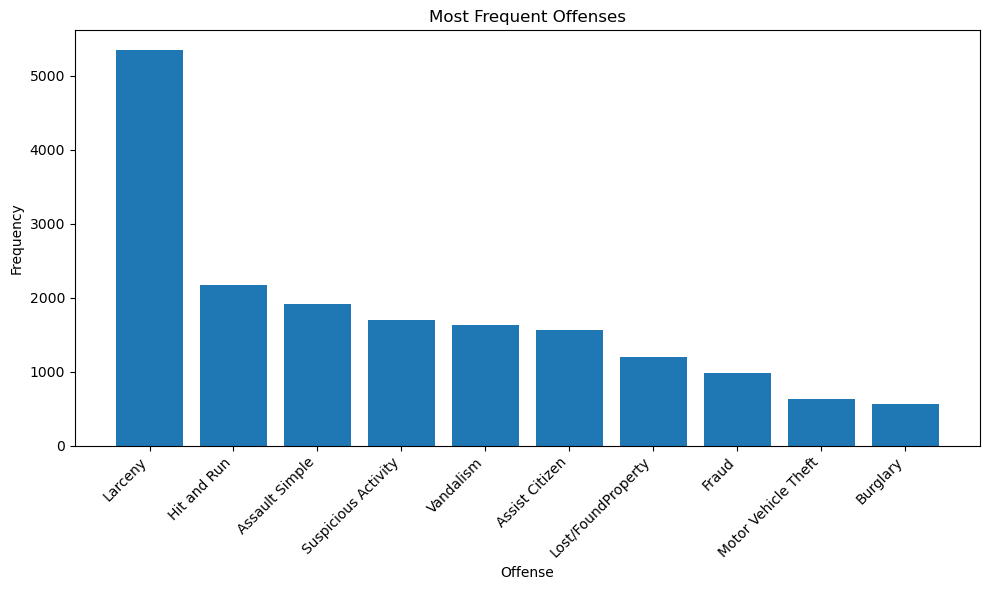

In [26]:
import matplotlib.pyplot as plt

offense_counts = crime['Offense'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(offense_counts.index, offense_counts.values)
plt.xlabel("Offense")
plt.ylabel("Frequency")
plt.title("Most Frequent Offenses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

crime['TimeOfDay'] = crime['HourReported'].apply(categorize_time)

In [28]:
crime['TimeOfDay'].value_counts()

TimeOfDay
Night        24961
Morning         77
Afternoon       73
Name: count, dtype: int64

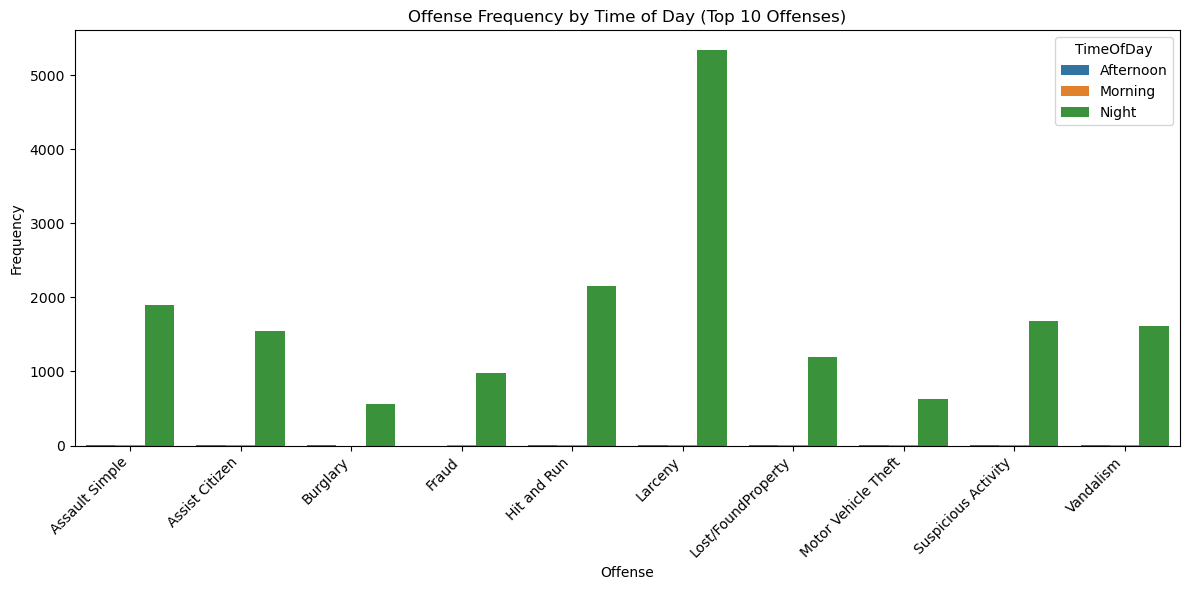

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_offenses = crime['Offense'].value_counts().nlargest(10).index
filtered_crime = crime[crime['Offense'].isin(top_10_offenses)]
grouped_data = filtered_crime.groupby(['Offense', 'TimeOfDay'])['Offense'].count().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Offense', y='Count', hue='TimeOfDay', data=grouped_data)
plt.xlabel("Offense")
plt.ylabel("Frequency")
plt.title("Offense Frequency by Time of Day (Top 10 Offenses)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
morning_offenses = crime[crime['TimeOfDay'] == 'Morning']
most_frequent_morning_offense = morning_offenses['Offense'].value_counts().idxmax()
print(f"The most frequent offense in the morning is: {most_frequent_morning_offense}")

afternoon_offenses = crime[crime['TimeOfDay'] == 'Afternoon']
most_frequent_afternoon_offense = afternoon_offenses['Offense'].value_counts().idxmax()
print(f"The most frequent offense in the afternoon is: {most_frequent_afternoon_offense}")

night_offenses = crime[crime['TimeOfDay'] == 'Night']
most_frequent_night_offense = night_offenses['Offense'].value_counts().idxmax()
print(f"The most frequent offense at night is: {most_frequent_night_offense}")

The most frequent offense in the morning is: Assault Simple
The most frequent offense in the afternoon is: Assist Citizen
The most frequent offense at night is: Larceny


/var/folders/r9/vr40l1ss0v71ty4xxtt_10j00000gn/T/ipykernel_62937/789457175.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_crimes["DateReported"] = pd.to_datetime(freq_crimes["DateReported"])
/var/folders/r9/vr40l1ss0v71ty4xxtt_10j00000gn/T/ipykernel_62937/789457175.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  freq_crimes["YearMonth"] = freq_crimes["DateReported"].dt.to_period("M")
/var/folders/r9/vr40l1ss0v71ty4xxtt_10j00000gn/T/ipykernel_62937/789457175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

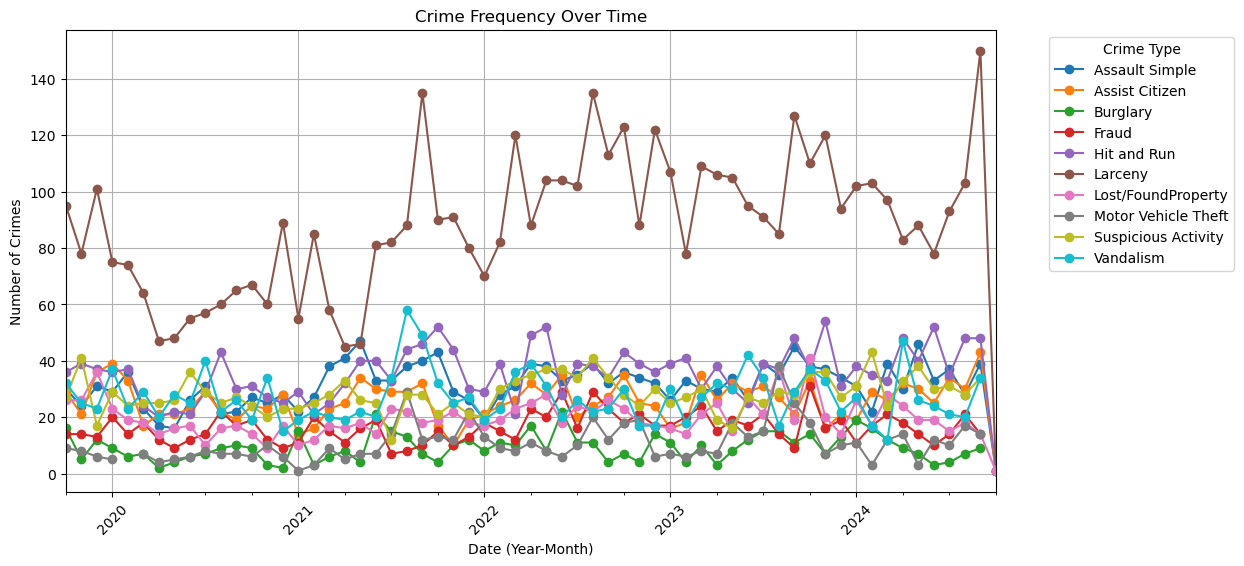

In [31]:
import matplotlib.pyplot as plt
top_10_crimes = crime["Offense"].value_counts().nlargest(10).index
freq_crimes = crime[crime["Offense"].isin(top_10_crimes)]

freq_crimes["DateReported"] = pd.to_datetime(freq_crimes["DateReported"])
freq_crimes["YearMonth"] = freq_crimes["DateReported"].dt.to_period("M")
crime_counts = freq_crimes.groupby(["YearMonth", "Offense"]).size().unstack()

plt.figure(figsize=(12, 6))
crime_counts.plot(kind="line", marker="o", ax=plt.gca())
plt.title("Crime Frequency Over Time")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Export Cleaned Data to CSV

In [32]:
# crime.to_csv('./cleaned_data.csv', index=False)